In [1]:
import csv
import string
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import array_to_img

In [2]:
VALIDATION_FILE = r"C:\Users\HP\Desktop\Sign Lng MNIST\dataset\sign_mnist_test.csv"
TRAINING_FILE = r"C:\Users\HP\Desktop\Sign Lng MNIST\dataset\sign_mnist_train.csv"

In [3]:
with open(TRAINING_FILE) as training_file:
  line = training_file.readline()
  print(f"First line (header) looks like this:\n{line}")
  line = training_file.readline()
  print(f"Each subsequent line (data points) look like this:\n{line}")

First line (header) looks like this:
label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pix

In [4]:
def parse_data_from_input(filename):
  with open(filename) as file:
    csv_reader = csv.reader(file, delimiter=",")

    labels = []
    images = []

    for i, row in enumerate(csv_reader):
       if i > 0:
        labels.append(row[0])
        images.append(row[1:])

    images = np.array(images, dtype=np.float64)
    labels = np.array(labels, dtype=np.float64)

    images = images.reshape(images.shape[0], 28, 28)

    return images, labels

In [5]:
training_images, training_labels = parse_data_from_input(TRAINING_FILE)
validation_images, validation_labels = parse_data_from_input(VALIDATION_FILE)

print(f"Training images has shape: {training_images.shape} and dtype: {training_images.dtype}")
print(f"Training labels has shape: {training_labels.shape} and dtype: {training_labels.dtype}")
print(f"Validation images has shape: {validation_images.shape} and dtype: {validation_images.dtype}")
print(f"Validation labels has shape: {validation_labels.shape} and dtype: {validation_labels.dtype}")

Training images has shape: (27455, 28, 28) and dtype: float64
Training labels has shape: (27455,) and dtype: float64
Validation images has shape: (7172, 28, 28) and dtype: float64
Validation labels has shape: (7172,) and dtype: float64


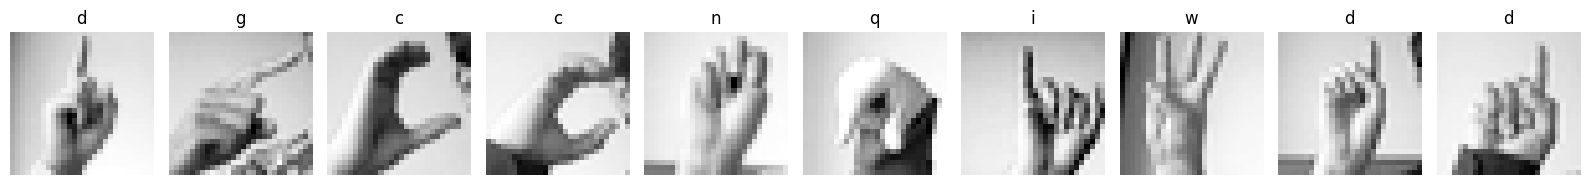

In [6]:
def plot_categories(training_images, training_labels):
  fig, axes = plt.subplots(1, 10, figsize=(16, 15))
  axes = axes.flatten()
  letters = list(string.ascii_lowercase)

  for k in range(10):
    img = training_images[k]
    img = np.expand_dims(img, axis=-1)
    img = array_to_img(img)
    ax = axes[k]
    ax.imshow(img, cmap="Greys_r")
    ax.set_title(f"{letters[int(training_labels[k])]}")
    ax.set_axis_off()

  plt.tight_layout()
  plt.show()

plot_categories(training_images, training_labels)

In [69]:
def train_val_generators(training_images, training_labels, validation_images, validation_labels):
  training_images = np.expand_dims(training_images, axis=-1)
  validation_images = np.expand_dims(validation_images, axis=-1)

  train_datagen = ImageDataGenerator(rescale=1./255,)


  # Pass in the appropriate arguments to the flow method
  train_generator = train_datagen.flow(x=training_images,
                                       y=training_labels,
                                       batch_size=32)

  validation_datagen = ImageDataGenerator(rescale=1./255)

  validation_generator = validation_datagen.flow(x=validation_images,
                                                 y=validation_labels,
                                                 batch_size=32)

  return train_generator, validation_generator

In [70]:
train_generator, validation_generator = train_val_generators(training_images, training_labels, validation_images, validation_labels)

print(f"Images of training generator have shape: {train_generator.x.shape}")
print(f"Labels of training generator have shape: {train_generator.y.shape}")
print(f"Images of validation generator have shape: {validation_generator.x.shape}")
print(f"Labels of validation generator have shape: {validation_generator.y.shape}")

Images of training generator have shape: (27455, 28, 28, 1)
Labels of training generator have shape: (27455,)
Images of validation generator have shape: (7172, 28, 28, 1)
Labels of validation generator have shape: (7172,)


In [127]:
def create_model():
  model = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(32,(3,3), activation='relu', input_shape=(28,28,1)),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Dropout(0.3),
      tf.keras.layers.Conv2D(64,(3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Dropout(0.3),
      tf.keras.layers.Conv2D(128,(3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Dropout(0.3),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(256, activation='relu'),
      tf.keras.layers.Dropout(0.5),
      tf.keras.layers.Dense(26, activation='softmax')
  ])


  model.compile(optimizer = 'adam',
                loss = 'sparse_categorical_crossentropy',
                metrics=['accuracy'])

  return model

In [128]:
from keras.callbacks import EarlyStopping,ReduceLROnPlateau

reduce_learning_rate = ReduceLROnPlateau(monitor='val_accuracy', 
                                         patience = 2, 
                                         factor=0.5, 
                                         verbose = 1)

In [146]:
model = create_model()

# Train your model
history = model.fit(train_generator,
                    epochs=15,
                    validation_data=validation_generator,
                    verbose = 1)

Epoch 1/15
858/858 [==============================] - 5s 5ms/step - loss: 1.9402 - accuracy: 0.3803 - val_loss: 0.7094 - val_accuracy: 0.7593
Epoch 2/15
858/858 [==============================] - 5s 6ms/step - loss: 0.6569 - accuracy: 0.7729 - val_loss: 0.3477 - val_accuracy: 0.8811
Epoch 3/15
858/858 [==============================] - 5s 6ms/step - loss: 0.3645 - accuracy: 0.8755 - val_loss: 0.2257 - val_accuracy: 0.9233
Epoch 4/15
858/858 [==============================] - 5s 6ms/step - loss: 0.2407 - accuracy: 0.9179 - val_loss: 0.1839 - val_accuracy: 0.9367
Epoch 5/15
858/858 [==============================] - 5s 5ms/step - loss: 0.1781 - accuracy: 0.9398 - val_loss: 0.1404 - val_accuracy: 0.9541
Epoch 6/15
858/858 [==============================] - 5s 6ms/step - loss: 0.1530 - accuracy: 0.9500 - val_loss: 0.1576 - val_accuracy: 0.9506
Epoch 7/15
858/858 [==============================] - 5s 5ms/step - loss: 0.1162 - accuracy: 0.9617 - val_loss: 0.1182 - val_accuracy: 0.9614
Epoch 

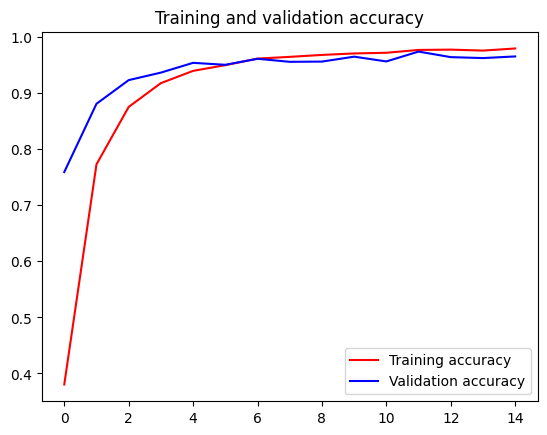

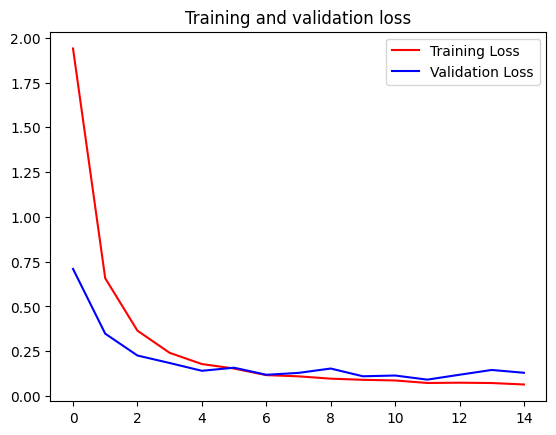

In [147]:
# Plot the chart for accuracy and loss on both training and validation
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [144]:
model.save('best_model.h5')

In [145]:
model.save_weights('best_model_weights.h5')

In [148]:
# Evaluvate for train generator
loss,acc = model.evaluate(train_generator , verbose = 0)

print('The accuracy of the model for training data is:',acc*100)
print('The Loss of the model for training data is:',loss)

# Evaluvate for validation generator
loss,acc = model.evaluate(validation_generator, verbose = 0)

print('The accuracy of the model for validation data is:',acc*100)
print('The Loss of the model for validation data is:',loss)

The accuracy of the model for training data is: 100.0
The Loss of the model for training data is: 0.00036187490331940353
The accuracy of the model for validation data is: 96.55604958534241
The Loss of the model for validation data is: 0.1293666809797287


In [158]:
import keras.utils as image
import numpy as np

def load_and_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(28, 28), color_mode='grayscale')
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array /= 255.0
    return img_array

# Example usage
img_path = r"C:\Users\HP\Desktop\Sign Lng MNIST\k.jpg"
img_array = load_and_preprocess_image(img_path)


In [159]:
# Predict the class
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions, axis=1)
print(predictions)
print(f"Predicted class: {predicted_class[0]}")

1/1 [==============================] - 0s 18ms/step
[[5.3308839e-03 2.2556560e-01 8.3549254e-05 5.2955287e-04 1.6143609e-02
  3.0026759e-03 9.5620475e-05 1.2740858e-04 3.2211665e-02 6.6579419e-06
  6.0176384e-03 1.2785371e-04 1.3938721e-02 4.5777704e-03 5.3666241e-04
  6.2224758e-03 1.5160981e-04 9.0146111e-04 9.2914347e-03 2.3148898e-03
  1.5349598e-01 3.3204895e-03 5.0754654e-01 8.4226597e-03 3.0100713e-05
  6.5292402e-06]]
Predicted class: 22


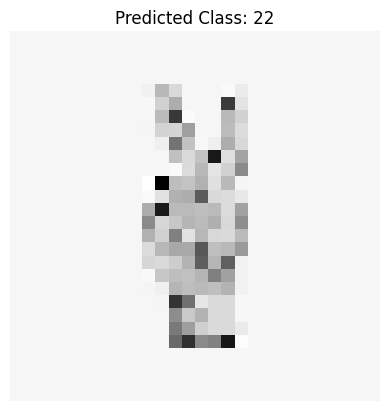

In [160]:
img = image.load_img(img_path, target_size=(28, 28), color_mode='grayscale')
plt.imshow(img, cmap='gray')
plt.title(f"Predicted Class: {predicted_class[0]}")
plt.axis('off')
plt.show()